## Name: Yen-Hsin (Cindy) Fang
## Section: 01

# Lab 4: Gradient Descent

The goal of this lab is to explore the gradient descent algorithm, to show how you can use gradient descent to find the minimum of a function. This is useful when that function is a loss function, and there is no closed-form solution for minimizing (like there is for linear regression with the Normal equations).

## Tools

#### Libraries:

- numpy: for processing
- sklearn: for model training  
- pandas: for data processing  
- plotnine: for visualization
- plotly: for 3d visualization

#### Datasets:

I'll suggest a couple of datasets here, but feel free to import some of your own and experiment. **sklearn.datasets** is a good place to start.

- Boston housing data: note that this is only for demonstration purposes. This dataset is not encouraged for use for purposes of actual investigation.

## Set up

In [1]:
import numpy as np
import pandas as pd

# from mpl_toolkits.mplot3d import Axes3D # required even though not ref'd!
from sklearn.linear_model import LinearRegression
from plotnine import ggplot, geom_point, geom_abline, aes, geom_line, theme_bw, ylab, xlab, xlim, stat_function
import plotly.graph_objects as plty

from types import SimpleNamespace

def load_boston(return_X_y=False):
    """Replacement function for loading in Boston House Prices"""
    df = pd.read_csv('./data/boston_house_prices.csv')
    X = df.drop(columns=['MEDV'])
    y = df['MEDV'].to_numpy()

    if return_X_y:
        return X, y 
    
    dataset  = SimpleNamespace(data=X, target=y)
    
    return dataset

In [2]:
# Define a normalize function for later use

def normalize(X):
    X = X.copy()
    for colname in X.columns:
        u = np.mean(X[colname])
        s = np.std(X[colname])
        if s>0.0:
            X[colname] = (X[colname] - u) / s
        else:
            X[colname] = (X[colname] - u)
    return X

## Simple function gradient descent

Let's define a very simple quadratic in one variable, $y = f(x) = (x-2)^2$ and then use an iterative solution to find the minimum value.

In [3]:
def f(x) : return (x-2)**2

We can hide all of the plotting details in a function, as we will use it multiple times.

In [4]:
def fplot(f, xrange, fstr = ''):
    p = ggplot(data = pd.DataFrame({'x':xrange}), mapping = aes(x = 'x')) + stat_function(fun = f) + ylab(fstr) + theme_bw()
    return p

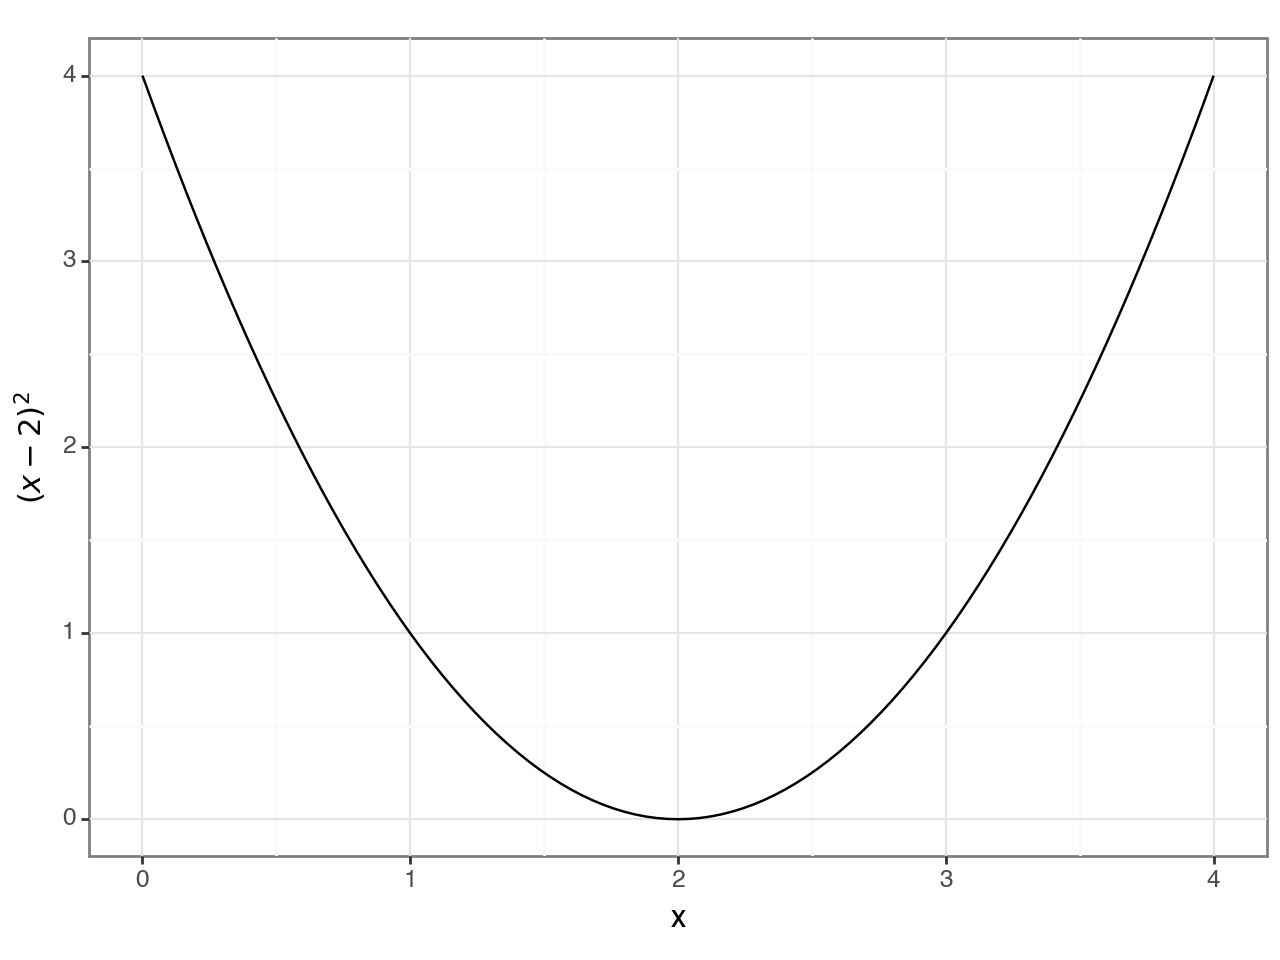

<Figure Size: (640 x 480)>

In [5]:
p1 = fplot(f, xrange=[0,4], fstr = "$(x-2)^2$")
p1

To minimize a function of $x$, we need the derivative of $f(x)$, which is just a function that gives the slope of the curve at every $x$.

**1. Define a function returning the derivative of $f(x)$**

You can ask for symbolic derivatives at a variety of sites, but here's one [solution](https://www.symbolab.com/solver/derivative-calculator/%5Cfrac%7Bd%7D%7Bdx%7D%5Cleft(x-2%5Cright)%5E%7B2%7D).

In [6]:
# your code here
def df(x):  return 2*(x-2)

<details>
<summary>Solution</summary>
<pre>
def df(x): return 2*(x-2)</pre>
</details>

**2. Pick an initial $x$ location and take a single step according to the derivative**

Use a learning rate of $\eta = 0.4$. The output should be `1.76`. (Also keep in mind that the minimum value is clearly at $x=2$.)

In [7]:
x = .8 # initial x location

In [8]:
# your code here
x = x - 0.4 * df(x)
print(x)

1.76


<details>
<summary>Solution</summary>
<pre>
x = x - .4 * df(x); print(x)
</pre>
</details>

**Q.** How can we optimize a quadratic function like this with a single minimum without using an iterative solution?

Set the derivative equal to zero and slove the equation! ex: 2*(x-2) = 0 -> x = 2

<details>
<summary>Solution</summary>
When the derivative goes to zero, it means the curve is flat, which in turn means we are at the function minimum. Set the derivative equal to zero and solve for $x$: $\frac{d}{dx} (x-2)^2 = 2(x-2) = 2x-4 = 0$.  Solving for $x$ gives $x=2$.
</details>

**3. Create a loop that takes five more steps (same learning rate)**

The output should look like:

```
1.952
1.9904
1.99808
1.999616
1.9999232
```

In [9]:
# your code here
for _ in range(5):
    x = x - 0.4 * df(x)
    print(x)

1.952
1.9904
1.99808
1.999616
1.9999232


<details>
<summary>Solution</summary>
<pre>
for i in range(5):
    x = x - 0.4 * df(x); print(x)
</pre>
</details>

Notice how fast the iteration moves $x$ to the location where $f(x)$ is minimum!

### Minimizing a more complicated function

This iterative minimization approach works for any (smooth) function, assuming we choose a small enough learning rate.  For example, let's find one of the minima for $f(x) = x \sin(0.6x)$ in the range \[-1,10\] (image below).

Depending on where we start, minimization will find either minimum at $x=0$ or at $8.18$.  The location of the lowest function value is called the global minimum and any others are called local minima.

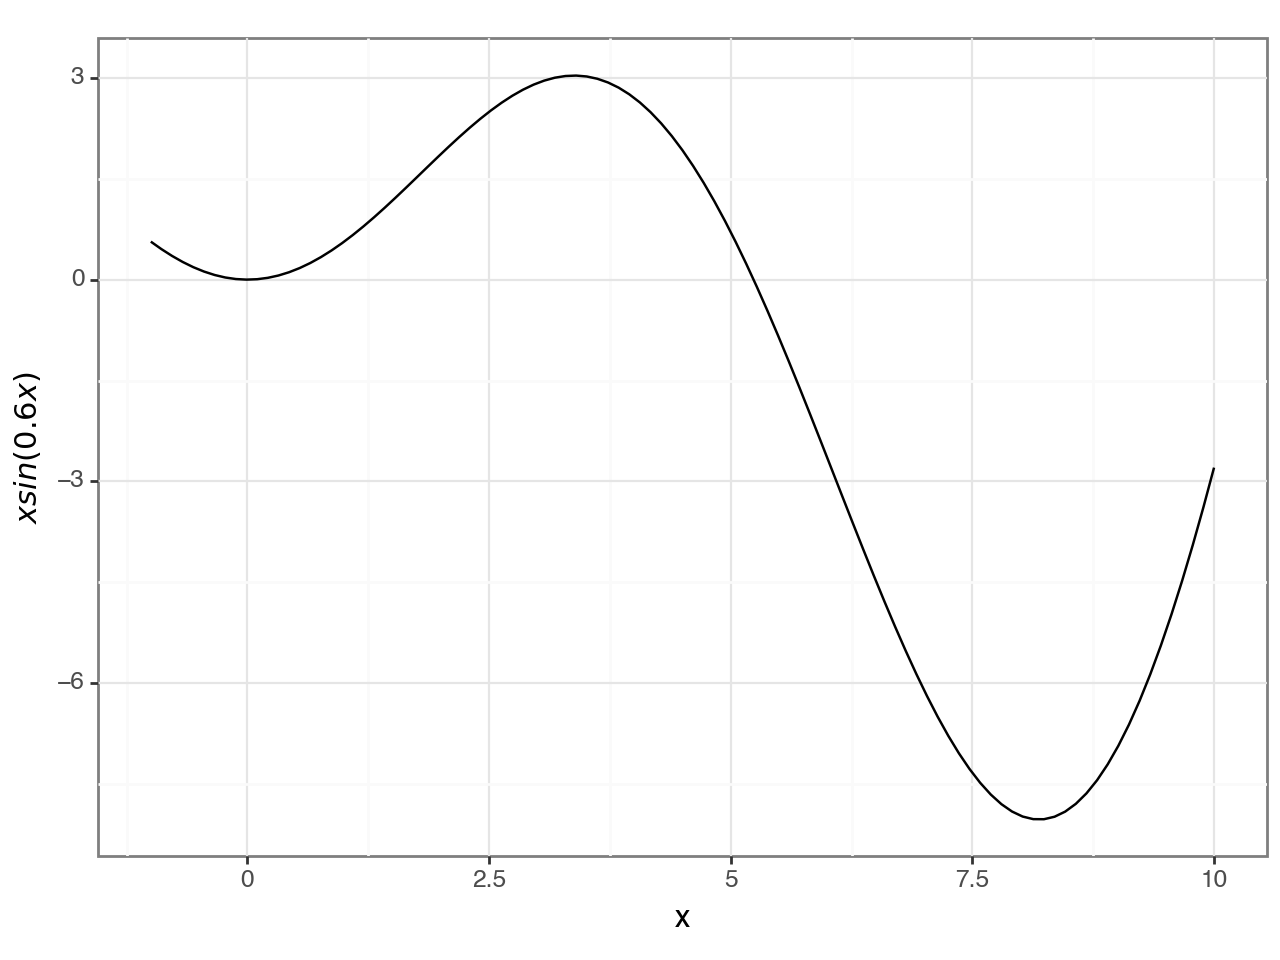

<Figure Size: (640 x 480)>

In [10]:
f = lambda x: x*np.sin(0.6*x)
p1 = fplot(f, xrange=[-1,10], fstr="$x sin(0.6x)$")
p1

**1. Define a function for $x \sin(0.6x)$**

In [11]:
# your code here
def f(x):   return np.sin(0.6*x)*x

<details>
<summary>Solution</summary>
<pre>
def f(x) : return np.sin(0.6*x)*x
or
f = lambda x: x*np.sin(0.6*x)
</pre>
</details>

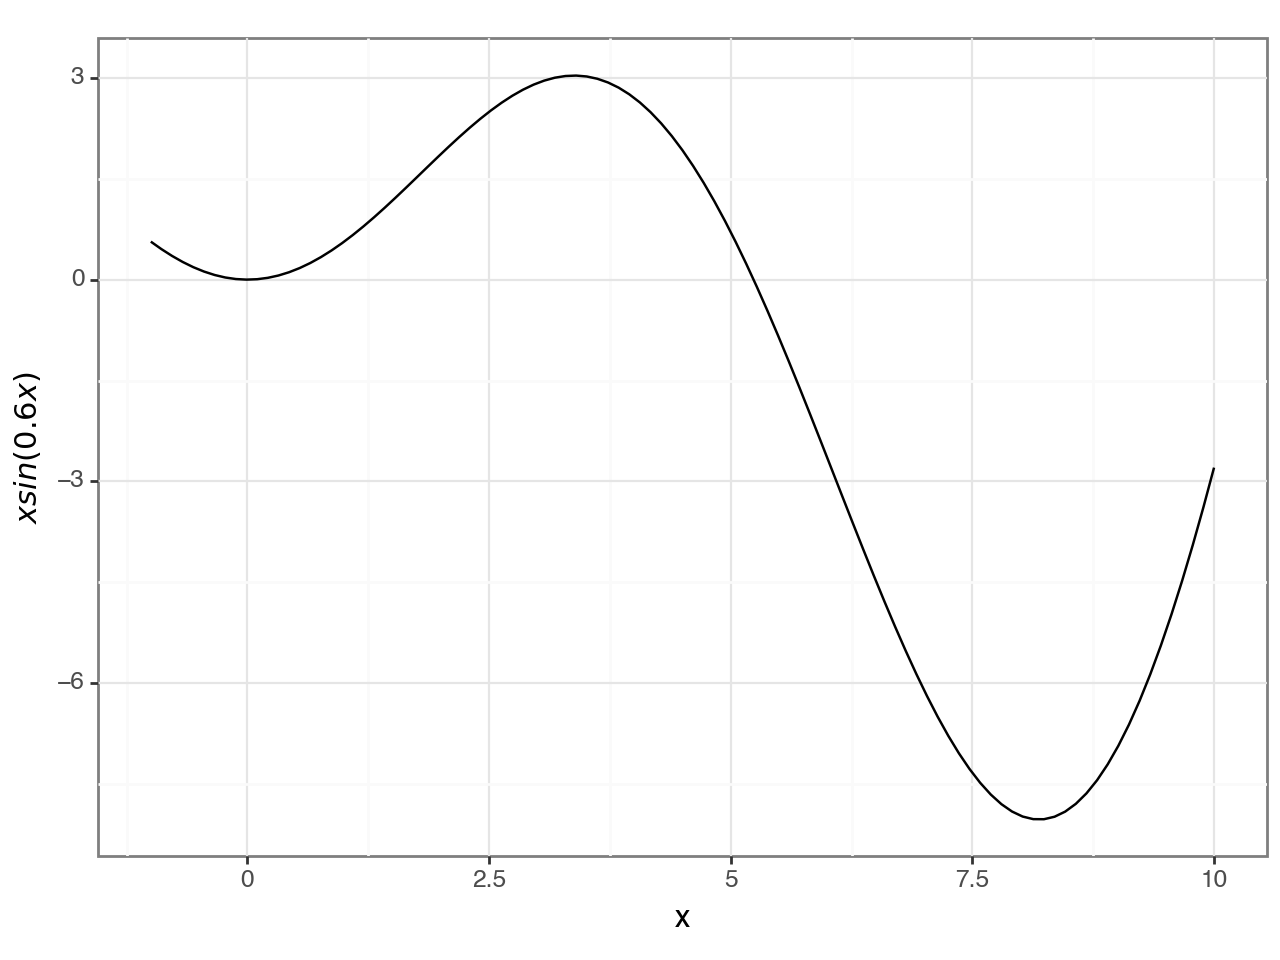

<Figure Size: (640 x 480)>

In [12]:
p1 = fplot(f, xrange=[-1,10], fstr="$x sin(0.6x)$")
p1

**2. Define the derivative function (name the function df): $\frac{df}{dx} = 0.6x \cos(0.6 x) + \sin(0.6 x)$**

In [13]:
# your code here
def df(x):   return 0.6*x*np.cos(0.6*x)+np.sin(0.6*x)

<details>
<summary>Solution</summary>
<pre>
def df(x): return 0.6*x * np.cos(0.6*x) + np.sin(0.6*x)
</pre>
</details>

**3. Pick a random initial value, $x_0$, between -1 and 10; display that value**

In [14]:
x0 = np.random.uniform(-1, 10) # pick value between -1 and 10
x0

3.514810266979379

**4. Start $x$ at $x_0$ and iterate 12 times using the gradient descent method**

Use a learning rate of 0.4.

In [15]:
x = x0
for i in range(12):
    x = x - .4 * df(x); print(f"{x:.10f}")

3.6036534556
3.7537744807
4.0106263817
4.4562366532
5.2304173491
6.4843736065
7.8964629267
8.2480331472
8.1732318200
8.1924694382
8.1876685247
8.1888764841


**5. Plot the starting and stopping locations on the curve**

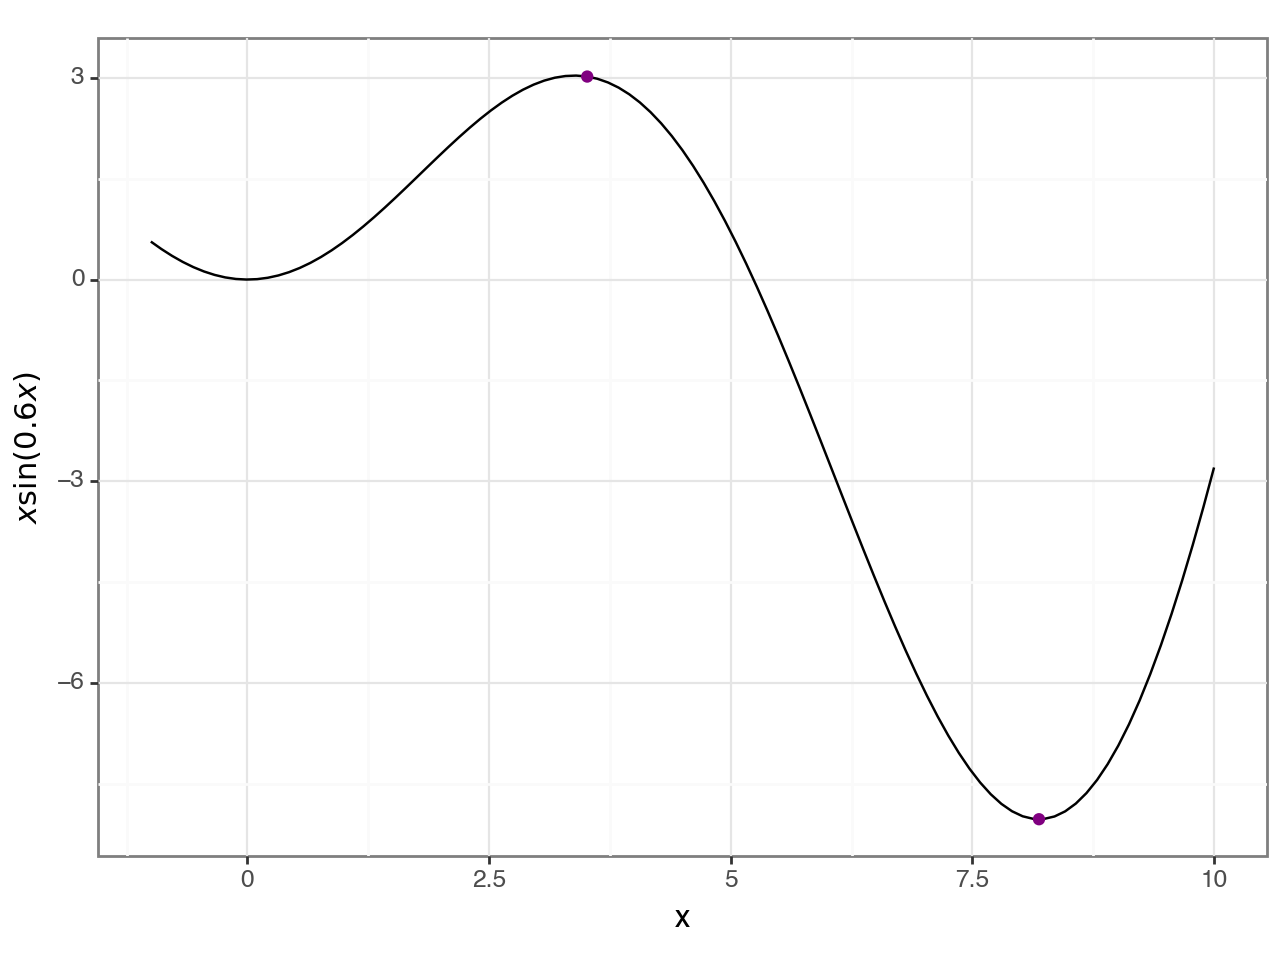

<Figure Size: (640 x 480)>

In [16]:
fplot(f, xrange=[-1,10], fstr="$x \sin(0.6x)$") + geom_point(data = pd.DataFrame({'x': [x0, x], 'y': [f(x0), f(x)]}), mapping = aes(x = 'x', y = 'y'), color = 'purple')

**6. Rerun the notebook several times to see how the random start location affects where it terminates.**

**Q.** Rather than iterating a fixed number of times, what's a better way to terminate the iteration?

stop when the gradient goes to zero

<details>
<summary>Solution</summary>
A simple stopping condition is when the (norm of the) gradient goes to zero, meaning that it does not suggest we move in any direction to get a lower loss of function value. We could also check to see if the new $x$ location is substantially different from the previous.
</details>

## The effect of learning rate on convergence

Let's move back to the simple function $f(x) = (x-2)^2$ and consider different learning rates to see the effect.

In [17]:
def df(x): return 2*(x-2)

Let's codify the minimization process in a handy function:

In [18]:
def minimize(df,x0,eta):
    x = x0
    for i in range(10):
        x = x - eta * df(x);
        print(f"{x:.2f}")

**1. Update the gradient descent loop to use a learning rate of 1.0**

Notice how the learning rate is so large that iteration oscillates between two (incorrect) solutions. The output should be:

```
3.20
0.80
3.20
0.80
3.20
0.80
3.20
0.80
3.20
0.80
```

In [19]:
minimize(df, x0=0.8, eta=1.0)

3.20
0.80
3.20
0.80
3.20
0.80
3.20
0.80
3.20
0.80


**2. Update the gradient descent loop to use a learning rate of 2.0**

Notice how the solution diverges when the learning rate is too big. The output should be:

```
5.60
-8.80
34.40
-95.20
293.60
-872.80
2626.40
-7871.20
23621.60
-70856.80
```

In [20]:
minimize(df, x0=0.8, eta=2.0)

5.60
-8.80
34.40
-95.20
293.60
-872.80
2626.40
-7871.20
23621.60
-70856.80


**2. Update the gradient descent loop to use a learning rate of 0.01**

Notice how **slowly** the solution converges when the learning rate is two small. The output should be:

```
0.82
0.85
0.87
0.89
0.92
0.94
0.96
0.98
1.00
1.02
```

In [21]:
minimize(df, x0=0.8, eta=0.01)

0.82
0.85
0.87
0.89
0.92
0.94
0.96
0.98
1.00
1.02


**Q.** How do you choose the learning rate $\eta$?

start with small eta and increase it to find the solution that is within out precision

<details>
<summary>Solution</summary>
The learning rate is specific to each problem unfortunately. A general strategy is to start with a small $\eta$ and gradually increase it until it starts to oscillate around the solution, then back off a little bit.  Having a single global learning rate for un-normalized data usually means very slow convergence. A learning rate small enough to be appropriate for a variable with small range is unlikely to be appropriate for variable with a large range.  This is overcome with the more sophisticated gradient descent methods, such as the Adagrad strategy you will use in your project. In that case, we keep a history of gradients and use that to speed up descent in directions that are historically shallow in the gradient.
</details>

## Examine loss surface for LSTAT var from Boston dataset

Turning to a common toy data set, the Boston housing data set, let's pick the most important single feature and look at the loss function for simple OLS regression.

**1. Load the Boston data set into a data frame**

In [22]:
boston = load_boston()
X = boston.data
y = boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


**2. Train an OLS linear regression model**

In [23]:
lm = LinearRegression()
lm.fit(X, y)

/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


LinearRegression()

**3. Let's just keep one feature, LSTAT**

In [24]:
X_ = X['LSTAT'].values.reshape(-1,1) # Extract just one x variable

**4. LSTAT is most important variable so train a new model with just `X['LSTAT']`**

Print out the true $\beta_0, \beta_1$ coefficients.

In [25]:
lm = LinearRegression()
lm.fit(X_, y)
print(f"True OLS coefficients: {np.array([lm.intercept_]+list(lm.coef_))}")

True OLS coefficients: [34.55384088 -0.95004935]


**5. Show scatterplot of price vs LSTAT with regression line**

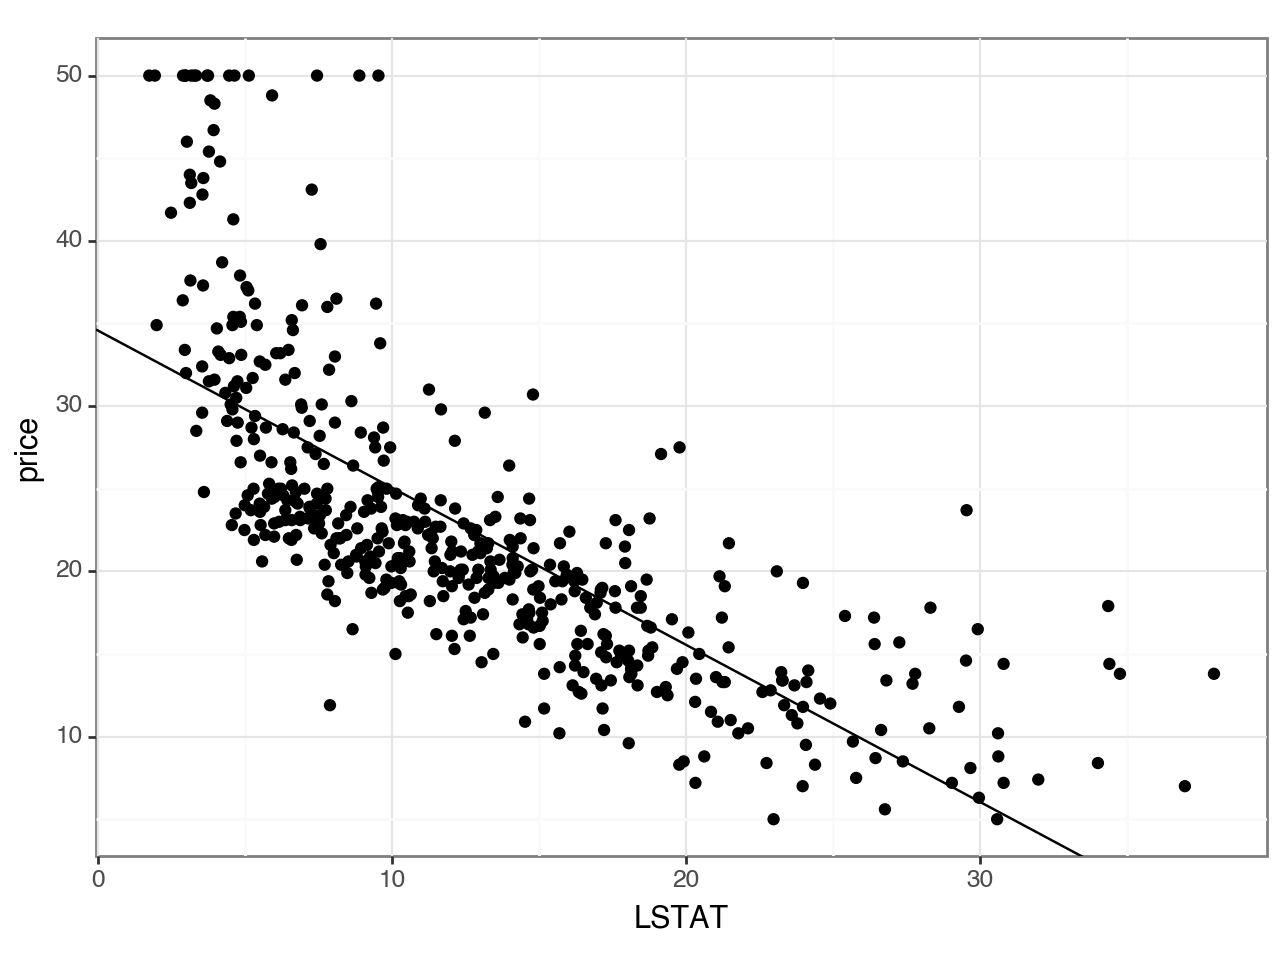

<Figure Size: (640 x 480)>

In [26]:
plot_data = X
plot_data['price'] = y
(
    ggplot(data = plot_data, mapping = aes(x = 'LSTAT', y = 'price')) + 
    geom_point() + 
    geom_abline(intercept = lm.intercept_, slope = lm.coef_) +
    theme_bw()
)

**6. Define an MSE loss function for single variable regression**

$$
\frac{1}{n} \sum_{i=1}^n (y - (\beta_0 + \beta_1 x^{(i)}))^2
$$

In [27]:
# your code here
def loss(beta, x, y):
    y_hat = beta[0] + x*beta[1]
    return np.mean((y-y_hat)**2)

<details>
<summary>Solution</summary>
<pre>
def loss(B,X,y):
    y_pred = B[0] + X*B[1]
    return np.mean((y - y_pred)**2)
</pre>
</details>

**7. Check the loss function value at the true OLS coordinates**

In [28]:
loss(np.array([34.55384088, -0.95004935]), X_, y.reshape(-1,1)) # demo loss function at minimum

38.48296722989416

**8. Plot the loss function in 3D in region around $\beta$s**

For 3d plots you can use `plotly` or `matplotlib`. I'll use `plotly` below. But first we have to make the grid of loss values ($z$) for each combination of $\beta_0$ and $\beta_1$. This should result in a pandas dataframe that is 70 x 70, where the ith and jth element is the loss value $z$ for the ith $\beta_0$ and the jth $\beta_1$. This is what plotly needs in order to plot a 3d plot.

In [29]:
# Get loss value for each combo of b0 and b1
b0_range = np.linspace(-50, 120, 70)
b1_range = np.linspace(-6, 4, 70)

z = [loss([i, j], X_, y.reshape(-1,1)) for i in b0_range for j in b1_range ]

In [30]:
z = np.array(z).reshape((-1, len(b0_range)))
z = pd.DataFrame(z, columns = b0_range)

In [31]:
# Plotly code for some cool interactive 3d plots

fig = plty.Figure(data=[plty.Surface(z=z.values,x = b0_range, y = b1_range)])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(title='Loss function surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### Repeat  using normalized data

**1. Normalize the $x$ variables. Recall the `normalize` function we created at the beginning of this activity.**

In [32]:
X_norm = normalize(X)

**2. Retrain the model**

In [33]:
X_ = X_norm['LSTAT'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(X_, y)
print(f"True OLS coefficients: {np.array([lm.intercept_]+list(lm.coef_))}")

True OLS coefficients: [22.53280632 -6.77765364]


**3. Show the marginal plot again**

Notice how only the $x$ scale has changed but not $y$, nor has the shape changed.

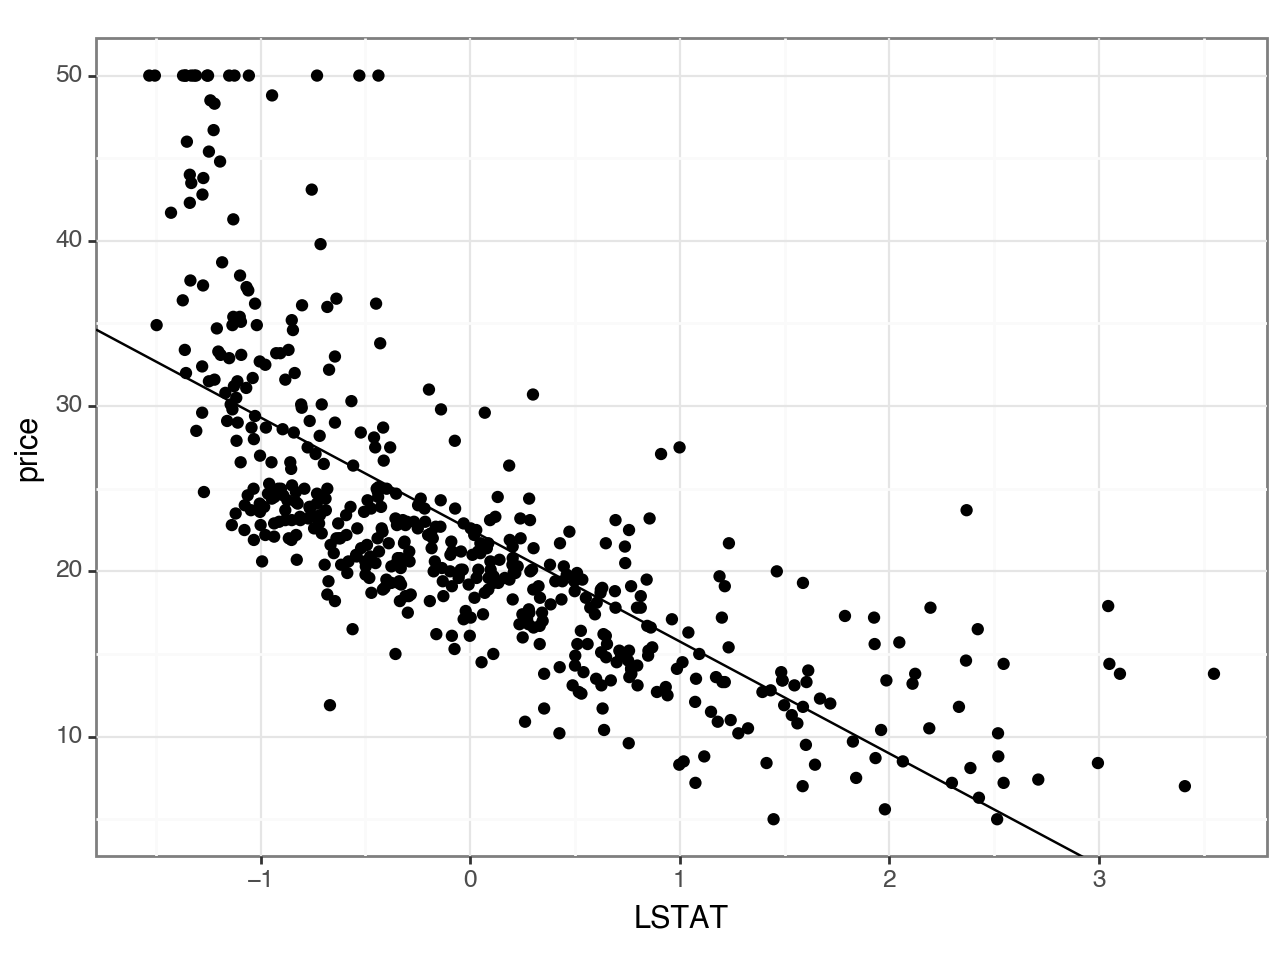

<Figure Size: (640 x 480)>

In [34]:
plot_data = X_norm
plot_data['price'] = y
(
    ggplot(data = plot_data, mapping = aes(x = 'LSTAT', y = 'price')) + 
    geom_point() + 
    geom_abline(intercept = lm.intercept_, slope = lm.coef_) +
    theme_bw()
)

**4. Plot the cost surface with a region around the new minimum location**

In [35]:
b0_range = np.linspace(15, 30, 70)
b1_range = np.linspace(-10, 5, 70)

z = [loss([i, j], X_, y.reshape(-1,1)) for i in b0_range for j in b1_range ]
        
z = np.array(z).reshape((-1, len(b0_range)))
z = pd.DataFrame(z)

fig = plty.Figure(data=[plty.Surface(z=z.values,x = b0_range, y = b1_range)])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(title='Loss function surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

**Q.** Compare the loss function contour lines of the unnormalized and normalized variables.

normalized variables create a bowl-shaped loss function, allowing faster convergence in gradient descent with a constant learning rate.

<details>
<summary>Solution</summary>
The normalized variables clearly result in a bowl shaped loss function, which gives spherical contours.  A gradient descent method with a single learning rate will convergent much faster given visible shape.
</details>